# Atividade 03

Nesse script, será desenvolvido:
* Uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.

* A função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade.

*  Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs. Deve ser considerado o efeito Tip-Downwash

*  Função do modelo gaussiano

* Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

Alunos: Guilherme Audi (21200902) Giovanna Martins (20204486)

In [6]:
import numpy as np
import pandas as pd

# Definindo a quantidade de dados
num_values = 20

# Gerando vetor de datas para 5 dias no verão e 5 dias no inverno
summer_dates = pd.date_range(start='2023-12-06', periods=10, freq='D')  # Dias de verão no Brasil 
winter_dates = pd.date_range(start='2023-06-21', periods=10, freq='D')  # Dias de inverno no Brasil
dates = summer_dates.append(winter_dates)

# Gerando vetor de cobertura de nuvens (valores entre 0 e 8)
cloud_cover = np.random.randint(0, 9, size=num_values)

# Gerando vetor de radiação solar usando o método de Monte Carlo com seno e cosseno
# Assumindo valores entre 0 e 1000 W/m^2
random_factors = np.random.rand(num_values)  # fatores aleatórios entre 0 e 1
solar_radiation = 500 + 500 * np.sin(2 * np.pi * random_factors) * np.cos(2 * np.pi * random_factors)

# Gerando vetor de velocidade do vento usando o método de Monte Carlo com seno e cosseno
# Assumindo valores entre 0 e 15 m/s
wind_speed = 7.5 + 7.5 * np.sin(2 * np.pi * random_factors) * np.cos(2 * np.pi * random_factors)

# Criando DataFrame para organizar os dados
data = pd.DataFrame({
    'Date': dates,
    'Cloud Cover': cloud_cover,
    'Solar Radiation (W/m^2)': solar_radiation,
    'Wind Speed (m/s)': wind_speed
})
print(data)


         Date  Cloud Cover  Solar Radiation (W/m^2)  Wind Speed (m/s)
0  2023-12-06            8               499.789341          7.496840
1  2023-12-07            8               737.455857         11.061838
2  2023-12-08            1               687.658194         10.314873
3  2023-12-09            0               671.545626         10.073184
4  2023-12-10            8               666.663303          9.999950
5  2023-12-11            6               256.909289          3.853639
6  2023-12-12            4               749.692075         11.245381
7  2023-12-13            0               451.283413          6.769251
8  2023-12-14            5               486.145442          7.292182
9  2023-12-15            6               724.264747         10.863971
10 2023-06-21            6               250.099665          3.751495
11 2023-06-22            6               740.568314         11.108525
12 2023-06-23            3               743.990255         11.159854
13 2023-06-24       

In [101]:
import pandas as pd

# Função para classificar a estabilidade de acordo com Pasquil
def classify_stability(row):
    wind_speed = row['Wind Speed (m/s)']
    cloud_cover = row['Cloud Cover']
    solar_radiation = row['Solar Radiation (W/m^2)']
    
    # Classificação baseada em cobertura de nuvens e velocidade do vento
    if cloud_cover <= 3:
        if wind_speed < 2:
            if solar_radiation > 600:
                return 'A'
            elif solar_radiation > 300:
                return 'B'
            else:
                return 'C'
        elif wind_speed < 3:
            if solar_radiation > 600:
                return 'A'
            elif solar_radiation > 300:
                return 'B'
            else:
                return 'C'
        elif wind_speed < 5:
            if solar_radiation > 600:
                return 'B'
            elif solar_radiation > 300:
                return 'C'
            else:
                return 'D'
        else:
            if solar_radiation > 600:
                return 'C'
            elif solar_radiation > 300:
                return 'D'
            else:
                return 'D'
    elif cloud_cover <= 6:
        if wind_speed < 3:
            return 'D'
        elif wind_speed < 5:
            return 'D'
        else:
            return 'D'
    else:
        if wind_speed < 2:
            return 'E'
        elif wind_speed < 3:
            return 'E'
        elif wind_speed < 5:
            return 'D'
        else:
            return 'D'

# Carregar os dados fictícios gerados anteriormente
data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=20, freq='D'),
    'Cloud Cover': np.random.randint(0, 9, size=20),
    'Solar Radiation (W/m^2)': 500 + 500 * np.sin(2 * np.pi * np.random.rand(20)) * np.cos(2 * np.pi * np.random.rand(20)),
    'Wind Speed (m/s)': 7.5 + 7.5 * np.sin(2 * np.pi * np.random.rand(20)) * np.cos(2 * np.pi * np.random.rand(20))
})

# Aplicando a função de classificação
data['Stability Class'] = data.apply(classify_stability, axis=1)

print(data)


         Date  Cloud Cover  Solar Radiation (W/m^2)  Wind Speed (m/s)  \
0  2024-01-01            4               977.335657          3.306585   
1  2024-01-02            3               122.157502          7.529248   
2  2024-01-03            6               589.846408         14.894112   
3  2024-01-04            2               812.893666          2.120606   
4  2024-01-05            0               742.675102          8.545965   
5  2024-01-06            1               979.999823          1.312679   
6  2024-01-07            6               749.806469          2.388566   
7  2024-01-08            3                61.679145          2.097006   
8  2024-01-09            7               462.066582          7.083303   
9  2024-01-10            8               953.511518          5.729101   
10 2024-01-11            5               766.538157         10.716334   
11 2024-01-12            3               360.764829         14.260618   
12 2024-01-13            2                17.965810

## 2) Implementação da função sigma YZ para estimar os coeficientes de dispersão

In [102]:
def sigmaYZ(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A' or classe == 'B':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe == 'E' or classe == 'F':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0015 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0002 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de ambiente deve ser "urbano" ou "rural"')

    # Adicionando declarações de impressão para depuração
    print(f"Classe: {classe}, Ambiente: {urbOrRural}, x: {x}")
    print(f"sigmaY: {sigmaY}, sigmaZ: {sigmaZ}")

    return sigmaY, sigmaZ

# Exemplo de chamada da função
x = 1000
classe = 'C'
urbOrRural = 'urbano'
sigmaY, sigmaZ = sigmaYZ(x, classe, urbOrRural)
print(f"Resultado: sigmaY = {sigmaY}, sigmaZ = {sigmaZ}")


Classe: C, Ambiente: urbano, x: 1000
sigmaY: 185.93393604027364, sigmaZ: 200.0
Resultado: sigmaY = 185.93393604027364, sigmaZ = 200.0


# 3) Implementação do método de Briggs para cálculo da sobrelevação da pluma. 

In [114]:
def briggs_plume_rise(wind_speed, stack_height, exit_velocity, stack_diameter, delta_temp, temp_ambient, stability_class):
    """
    Calcula a sobrelevação da pluma usando a fórmula de Briggs considerando classes de estabilidade.
    
    Parâmetros:
    - wind_speed: velocidade do vento (m/s)
    - stack_height: altura da chaminé (m)
    - exit_velocity: velocidade de saída dos gases (m/s)
    - stack_diameter: diâmetro da chaminé (m)
    - delta_temp: diferença de temperatura entre os gases de saída e o ar ambiente (K)
    - temp_ambient: temperatura do ar ambiente (K)
    - stability_class: classe de estabilidade de Pasquil (C ou D)
    
    Retorna:
    - plume_rise: sobrelevação da pluma (m)
    """
    
    g = 9.81  # aceleração gravitacional (m/s^2)
    buoyancy_flux = (g * stack_diameter**2 * exit_velocity * delta_temp) / (4 * temp_ambient)  # fluxo de flutuabilidade
    
    if stability_class == 'C':
        plume_rise = (2.6 * buoyancy_flux**0.333 * stack_height**0.667) / (wind_speed + 0.5 * exit_velocity)
    elif stability_class == 'D':
        plume_rise = (1.6 * buoyancy_flux**0.333 * stack_height**0.667) / (wind_speed + 0.5 * exit_velocity)
    else:
        raise ValueError('Classe de estabilidade inválida. Use "C" ou "D".')
    
    return plume_rise

# Parâmetros fixos
stack_height = 45 # m
exit_velocity = 10  # m/s
stack_diameter = 3  # m
delta_temp = 150  # K
temp_ambient = 298  # K

# Aplicando a função ao DataFrame para calcular a pluma
data['Plume Rise'] = data.apply(lambda row: briggs_plume_rise(
    row['Wind Speed (m/s)'],
    stack_height,
    exit_velocity,
    stack_diameter,
    delta_temp,
    temp_ambient,
    stability_class
), axis=1)
print(data)

         Date  Cloud Cover  Solar Radiation (W/m^2)  Wind Speed (m/s)  \
0  2024-01-01            4               977.335657          3.306585   
1  2024-01-02            3               122.157502          7.529248   
2  2024-01-03            6               589.846408         14.894112   
3  2024-01-04            2               812.893666          2.120606   
4  2024-01-05            0               742.675102          8.545965   
5  2024-01-06            1               979.999823          1.312679   
6  2024-01-07            6               749.806469          2.388566   
7  2024-01-08            3                61.679145          2.097006   
8  2024-01-09            7               462.066582          7.083303   
9  2024-01-10            8               953.511518          5.729101   
10 2024-01-11            5               766.538157         10.716334   
11 2024-01-12            3               360.764829         14.260618   
12 2024-01-13            2                17.965810

## 4) implementar o modelo gaussiano

Observações de parametros utilizados: Como o estudo de poluição atmosférica deve ser simulado no pior cenário, aqui será considerado o menor valor de sobrelevação da pluma, de modo a simular o momento em que, mesmo com a pluma mais baixa, a altura da chaminé é suficente para dispersar poluentes.
Como H =  Maior altura de sobrelevação da pluma + altura da chaminé, foi aferida a altura de 45M para a chaminé do empreendimento da tupy, em Joinville, através da ferramenta goolge earth. 


In [116]:
print("Menor valor de elevação da pluma gerado:")
print(data['Plume Rise'].min())

Menor valor de elevação da pluma gerado:
7.946364307967324


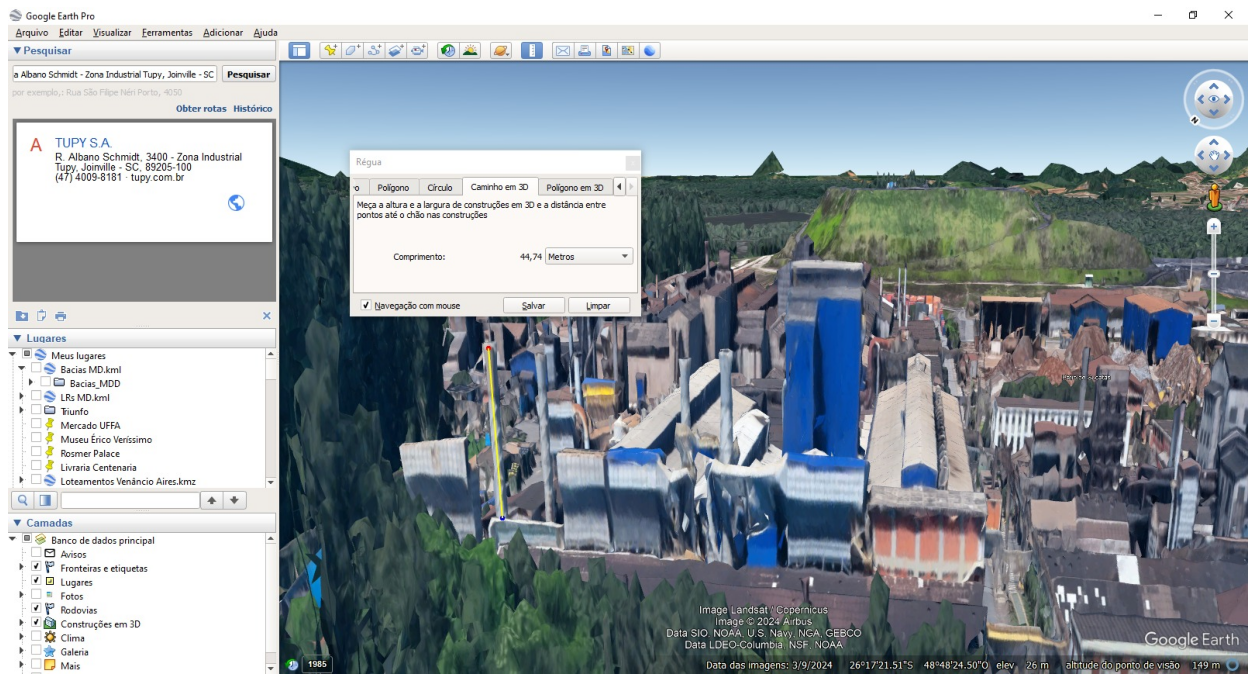

In [117]:
#referencia google earth 
import matplotlib.image as mpimg
caminho_arquivo = r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\inputs\chamine.jpeg'
imagem = mpimg.imread(caminho_arquivo)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(imagem)
plt.axis('off')
plt.show()

In [29]:
# H ALTURA CHAMINÉ + SOBRELEVAÇÃO 
#Z ALTURA DO NARIZ
#Y DIREÇÃO PERPENDICULAR AO EIXO DA PLUMA 
#VELOCIDADE DO VENTO NO DIA
#QS TAXA DE MEISSÃO DO EMPRENDIEMNTO.

In [136]:
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc
    # Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H)

print("A concentração estimada é = " +str(conc) + ' g/m³')

A concentração estimada é = [4.58277753e-021 5.78784951e-021 7.77738055e-021 1.09930559e-020
 1.61199775e-020 2.42178445e-020 3.69210327e-020 5.67427964e-020
 8.75363262e-020 1.35191339e-019 2.08683203e-019 3.21648017e-019
 4.94739857e-019 7.59147405e-019 1.16182359e-018 1.77323797e-018
 2.69883221e-018 4.09589375e-018 6.19833091e-018 9.35293332e-018
 1.40722722e-017 2.11116293e-017 3.15805093e-017 4.71037637e-017
 7.00536468e-017 1.03882952e-016 1.53601714e-016 2.26457126e-016
 3.32900174e-016 4.87955391e-016 7.13155553e-016 1.03926537e-015
 1.51010336e-015 2.18788718e-015 3.16068487e-015 4.55276776e-015
 6.53894706e-015 9.36436147e-015 1.33716974e-014 1.90385091e-014
 2.70282144e-014 3.82595447e-014 5.40008086e-014 7.59974030e-014
 1.06643715e-013 1.49214078e-013 2.08172021e-013 2.89582918e-013
 4.01662739e-013 5.55505258e-013 7.66042432e-013 1.05330829e-012
 1.44409645e-012 1.97412625e-012 2.69086350e-012 3.65718084e-012
 4.95609050e-012 6.69684186e-012 9.02274912e-012 1.21212035e-0

deltaH = 7.946364307967324
A pluma subiu


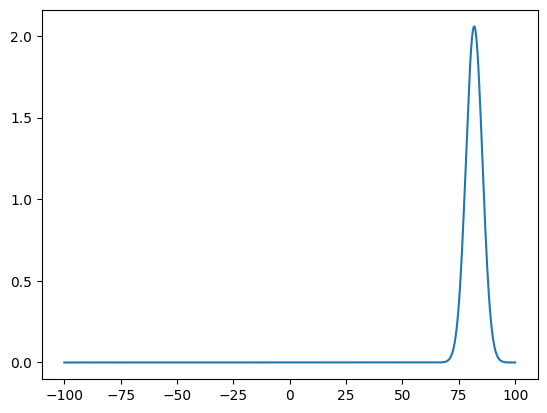

In [149]:
# Criando domínio de modelagem 
x = np.linspace(-100,100,500)
#print(x)
y = np.linspace(-1000,100,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)


# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 50 # m altura geométrica da chaminé
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical

#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = data['Plume Rise'].min()
    print('deltaH = '+str(deltaH))
    hef = hg+deltaH
    print('A pluma subiu')
else:
    hef = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,hef)

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])

## 5)Variação da altura da chaminé para adequação á resolução do conama 

Nesta etapa, realizaremos a análise de poluentes quanto a resolução conama 491. Entretanto, é válido ressaltar que, tendo em vista o caráter didático do script, no qual foram atribuídos valores aleatórios de velocidade do vento, radiação e cobetura de nuvens, O Valor da concentração contido na pluma inical para o polunete PM-10 já está dentro do requisitado pela resolução conama 491. 

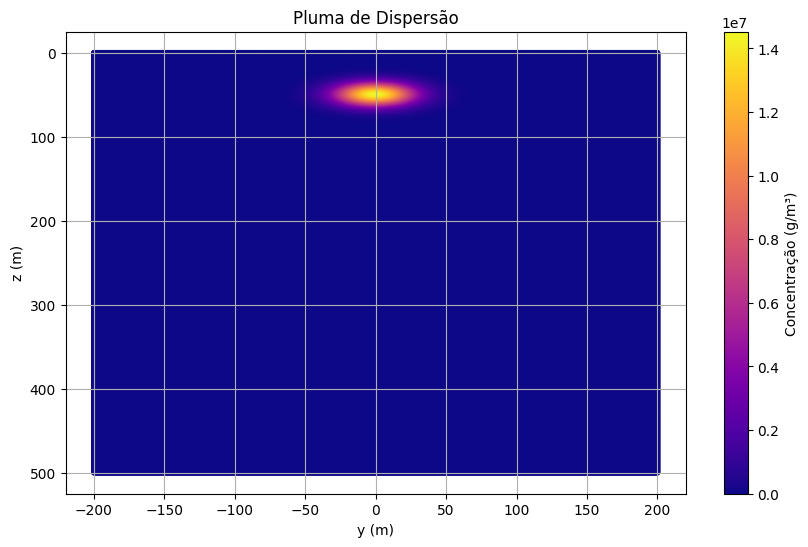

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Definição dos parâmetros
# Criando uma função do modelo gaussiano
H = data['Plume Rise'].min() + 45 # menor valor de elevação da pluma + altura da chaminé
qs= 91270.27 #g/s #PM-10
u = 5 #m/s
y = 0 # dispersão perpendicular da pluma
z = 1.5 #altura do nariz

# Dados gerados
y = np.linspace(-200, 200, 1000)  # Coordenada y (m)
z = np.linspace(0, 500, 1000)  # Coordenada z (m)

# Calculando a concentração para cada par de coordenadas (y, z)
Y, Z = np.meshgrid(y, z)
sigmaY = 20  # Valor de exemplo para sigmaY
sigmaZ = 10  # Valor de exemplo para sigmaZ
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, Y, Z, H)

# Plotando o gráfico de dispersão da pluma de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(Y, Z, c=conc, cmap='plasma', marker='.')
plt.colorbar(label='Concentração (g/m³)')
plt.title('Pluma de Dispersão')
plt.xlabel('y (m)')
plt.ylabel('z (m)')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, xx, yy, H)